In [1]:
#3.4.3
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words =10000)

import numpy as np
import random

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

print(x_val.shape)
print(y_val.shape)

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=1024,
                    validation_data=(x_val, y_val))

results = model.evaluate(x_test, y_test)

print(history.history.keys())

2021-11-04 20:08:56.721248: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(10000, 10000)
(10000,)


2021-11-04 20:08:58.146018: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/4
15/15 [==============================] - 2s 72ms/step - loss: 0.5465 - accuracy: 0.7305 - val_loss: 0.4095 - val_accuracy: 0.8307
Epoch 2/4
15/15 [==============================] - 1s 38ms/step - loss: 0.3039 - accuracy: 0.8879 - val_loss: 0.2895 - val_accuracy: 0.8838
Epoch 3/4
15/15 [==============================] - 1s 40ms/step - loss: 0.2127 - accuracy: 0.9209 - val_loss: 0.3017 - val_accuracy: 0.8773
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.3400 - accuracy: 0.8677
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


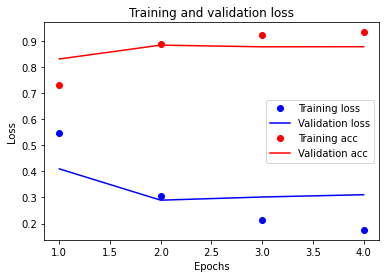

In [2]:
#3.4.4
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.plot(epochs, acc_values, 'ro', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()